<a href="https://colab.research.google.com/github/milioe/Moravec/blob/main/3_ComputerVision1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks and Computer Vision with TF

* [`Pizza link`](https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip)

* [`10 food all classes`](10_food_classes_all_data)

What we are going to cover:
* Getting a dataset
* Architecture of Convolutional Neural Network
* Quick end-to-end example
* Steps in modelling for binary image classification
  * Preparing data
  * Creating CNN Architecture
  * Fitting a model
  * Evaluating a model
  * Improving a model
  * Making a prediction
* Steps in modelling for multi-class image classification


# Getting data

We take a preprocessed dataset taken from [`Food 101 image dataset`](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/)

In [17]:
import zipfile

In [18]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2022-06-29 02:13:45--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 142.250.4.128, 74.125.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   112MB/s    in 0.9s    

2022-06-29 02:13:46 (112 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



In [19]:
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [20]:
!ls 

pizza_steak  pizza_steak.zip  pizza_steak.zip.1  sample_data


In [21]:
!ls pizza_steak/

test  train


In [22]:
!ls pizza_steak/test/steak

100274.jpg   1653815.jpg  2307638.jpg  2944161.jpg  3622237.jpg  638678.jpg
1012080.jpg  1655387.jpg  2308682.jpg  2945937.jpg  365725.jpg	 640024.jpg
1016217.jpg  1662212.jpg  2315011.jpg  296375.jpg   3662612.jpg  647683.jpg
1064847.jpg  168551.jpg   2339231.jpg  2981911.jpg  367422.jpg	 653303.jpg
1082384.jpg  1687010.jpg  2353677.jpg  2984679.jpg  3681340.jpg  66183.jpg
108310.jpg   1718949.jpg  2365038.jpg  2989645.jpg  3753767.jpg  66207.jpg
1094883.jpg  1778186.jpg  2372048.jpg  3013185.jpg  3757027.jpg  66858.jpg
1107549.jpg  1792128.jpg  2382600.jpg  3013404.jpg  378397.jpg	 670345.jpg
1118585.jpg  1794566.jpg  2416973.jpg  3029602.jpg  3786535.jpg  673127.jpg
1163050.jpg  1848046.jpg  2475366.jpg  3048920.jpg  3835895.jpg  690177.jpg
1166047.jpg  1848936.jpg  2484823.jpg  3060047.jpg  3842125.jpg  690477.jpg
1190808.jpg  1868005.jpg  2510026.jpg  3062369.jpg  3873283.jpg  697562.jpg
1194662.jpg  1872368.jpg  2512387.jpg  3063435.jpg  3873655.jpg  7056.jpg
1206166.jpg  1874088

In [23]:
import os # move through os system or files
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [24]:
import pathlib 
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [25]:
# View images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random(target_dir, target_class):
  target_folder = target_dir+target_class

  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0]) # target_folder/test/00001.jpg
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img



Image shape: (512, 512, 3)


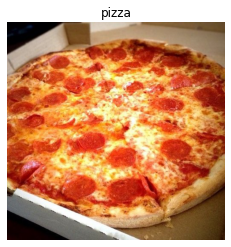

In [26]:
img = view_random(target_dir="pizza_steak/train/",
                  target_class="pizza")

In [27]:
img

array([[[ 0,  0,  2],
        [ 0,  0,  2],
        [ 0,  0,  2],
        ...,
        [94, 69, 38],
        [93, 68, 37],
        [93, 68, 37]],

       [[ 0,  0,  2],
        [ 0,  0,  2],
        [ 0,  0,  2],
        ...,
        [97, 72, 41],
        [96, 71, 40],
        [96, 71, 40]],

       [[ 0,  0,  2],
        [ 0,  0,  2],
        [ 0,  0,  2],
        ...,
        [99, 74, 43],
        [99, 74, 43],
        [98, 73, 42]],

       ...,

       [[32,  0,  1],
        [32,  0,  1],
        [32,  0,  1],
        ...,
        [58, 31, 10],
        [63, 37, 14],
        [63, 37, 14]],

       [[33,  1,  2],
        [33,  1,  2],
        [32,  0,  1],
        ...,
        [56, 29,  8],
        [63, 37, 14],
        [63, 37, 14]],

       [[36,  2,  3],
        [33,  1,  2],
        [32,  0,  1],
        ...,
        [55, 28,  7],
        [62, 36, 13],
        [62, 36, 13]]], dtype=uint8)

In [28]:
img/255.0

array([[[0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        ...,
        [0.36862745, 0.27058824, 0.14901961],
        [0.36470588, 0.26666667, 0.14509804],
        [0.36470588, 0.26666667, 0.14509804]],

       [[0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        ...,
        [0.38039216, 0.28235294, 0.16078431],
        [0.37647059, 0.27843137, 0.15686275],
        [0.37647059, 0.27843137, 0.15686275]],

       [[0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        ...,
        [0.38823529, 0.29019608, 0.16862745],
        [0.38823529, 0.29019608, 0.16862745],
        [0.38431373, 0.28627451, 0.16470588]],

       ...,

       [[0.1254902 , 0.        , 0.00392157],
        [0.1254902 , 0.        , 0.00392157],
        [0.1254902 , 0

## Resources:
* [CNN Explainer](https://poloclub.github.io/cnn-explainer/)
* [Explained Visually](https://setosa.io/ev/image-kernels/)
* [Food 101](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/)
* [Distil Pub](https://distill.pub/)
* [A guide to convolution arithmetic for deep learning](https://arxiv.org/pdf/1603.07285.pdf)

🚨 **Baseline_** 50.76% random forest accuracy

## Hyperparameters

* `2D` - means `x`, `y`, two dimensional (height, width), even tough we have 3 color channels
* `kernel_size`- size of our filter 
* `filter` - **feature extractor**
* `stride` - the number of pixels a filter will move across as it covers the image
* `padding` - it can be either `same` or `valid`
  * `same` = adds zeros to the outside
  * `valid` = adds cuts off excess pixels where the filter doesn't fit (e.g. 224 pixels wide divided by a kernel sixe of 3 (224/3=74.6) means a single pixel will get cut off of the end)

In [29]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 0. Set random seed
tf.random.set_seed(42)

## IMAGE PREPROCESSING ##
# a. Preprocess data (get all pixels between 0 and 1)
train_datagen = ImageDataGenerator(rescale=1/255)
valid_datagen = ImageDataGenerator(rescale=1/255)

# b. Setup train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# c. Import data from directories (X_train, y_train)
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224), # image pixels
                                               class_mode="binary", # pizza vs steak
                                               seed=42)
# (X_test, y_test) 
valid_data = valid_datagen.flow_from_directory(test_dir,
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              seed=42)

# 1. Create a model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224,3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])


# 2. Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data), # 47 # any number(:
                        validation_data=valid_data,
                        validation_steps=len(valid_data)) # 16



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 14s 295ms/step - loss: 0.5630 - accuracy: 0.7087 - val_loss: 0.4192 - val_accuracy: 0.8020
Epoch 2/5
47/47 [==============================] - 9s 189ms/step - loss: 0.4565 - accuracy: 0.7913 - val_loss: 0.3461 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 9s 189ms/step - loss: 0.3974 - accuracy: 0.8293 - val_loss: 0.3420 - val_accuracy: 0.8680
Epoch 4/5
47/47 [==============================] - 9s 190ms/step - loss: 0.3556 - accuracy: 0.8373 - val_loss: 0.3316 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 9s 190ms/step - loss: 0.3320 - accuracy: 0.8560 - val_loss: 0.3003 - val_accuracy: 0.8860


In [30]:
len(train_data), len(valid_data)

(47, 16)

In [31]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [32]:
model_1.evaluate(valid_data)

16/16 [==============================] - 2s 132ms/step - loss: 0.3003 - accuracy: 0.8860


[0.3002541661262512, 0.8859999775886536]

## Model 2

In [34]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224,224,3)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid"),
])

# 2 compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3 Fit the model
model_2.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data), # lenght of train dataset = 47
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


47/47 [==============================] - 9s 179ms/step - loss: 0.9543 - accuracy: 0.5013 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 180ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 185ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 174ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 176ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [35]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_2 (Dense)             (None, 4)                 602116    
                                                                 
 dense_3 (Dense)             (None, 4)                 20        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


`model_1` has 31,101 trainable parameters

`model_2` has 602,141 trainable parameters

🔑 **Note**: Think of trainable parameters as *patterns* a model can learn from data (or from images). More layers (or units) does not mean more parameters. 

**Fully-connected layers** vs old architectures



In [38]:
# Set random seed
tf.random.set_seed(42)

# # Create model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224,224,3)),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# Fit the model
model_3.fit(train_data,
            epochs=10,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


47/47 [==============================] - 9s 181ms/step - loss: 2.6937 - accuracy: 0.6307 - val_loss: 0.8671 - val_accuracy: 0.6820
Epoch 2/10
47/47 [==============================] - 9s 191ms/step - loss: 0.8414 - accuracy: 0.6740 - val_loss: 0.4923 - val_accuracy: 0.7840
Epoch 3/10
47/47 [==============================] - 8s 179ms/step - loss: 0.6452 - accuracy: 0.7240 - val_loss: 0.6795 - val_accuracy: 0.7040
Epoch 4/10
47/47 [==============================] - 8s 174ms/step - loss: 0.5800 - accuracy: 0.7407 - val_loss: 0.4318 - val_accuracy: 0.7960
Epoch 5/10
47/47 [==============================] - 9s 184ms/step - loss: 0.4796 - accuracy: 0.7853 - val_loss: 0.5403 - val_accuracy: 0.7440
Epoch 6/10
47/47 [==============================] - 8s 174ms/step - loss: 0.5062 - accuracy: 0.7753 - val_loss: 0.4450 - val_accuracy: 0.7940
Epoch 7/10
47/47 [==============================] - 8s 174ms/step - loss: 0.4468 - accuracy: 0.8093 - val_loss: 0.5307 - val_accuracy: 0.7500
Epoch 8/10
47/47 

In [39]:
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 150528)            0         
                                                                 
 dense_9 (Dense)             (None, 100)               15052900  
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 100)               10100     
                                                                 
 dense_12 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [44]:
score1 = model_1.evaluate(train_data)[1]
score2 = model_2.evaluate(train_data)[1]
score3 = model_3.evaluate(train_data)[1]

47/47 [==============================] - 6s 129ms/step - loss: 0.3466 - accuracy: 0.8500


In [50]:
import pandas as pd
summary = pd.DataFrame({"Model1":score1, "Model2":score2, "Model3":score3}, index=[0])
summary

,Model1,Model2,Model3
0,0.888667,0.5,0.85


## Re-Preprocessing Data

In [51]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2022-06-29 02:55:00--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.128, 172.217.194.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.2’

pizza_steak.zip.2   100%[===================>] 104.47M   301MB/s    in 0.3s    

2022-06-29 02:55:00 (301 MB/s) - ‘pizza_steak.zip.2’ saved [109540975/109540975]



In [52]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [55]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [56]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                            target_size=(224,224),
                                            class_mode="binary",
                                            batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                            target_size=(224,224),
                                            class_mode="binary",
                                            batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [57]:
# Get a sample of the training data batch
images, labels = train_data.next() # get "next" batch of images/labels

In [60]:
len(images), len(labels)

(32, 32)

In [61]:
images[:2], images[0].shape

(array([[[[0.01176471, 0.01176471, 0.00392157],
          [0.01176471, 0.01176471, 0.00392157],
          [0.01176471, 0.01176471, 0.00392157],
          ...,
          [0.01568628, 0.01176471, 0.        ],
          [0.01568628, 0.01176471, 0.        ],
          [0.01568628, 0.01176471, 0.        ]],
 
         [[0.01176471, 0.01176471, 0.00392157],
          [0.01176471, 0.01176471, 0.00392157],
          [0.01176471, 0.01176471, 0.00392157],
          ...,
          [0.01176471, 0.01176471, 0.00392157],
          [0.01176471, 0.01176471, 0.00392157],
          [0.01176471, 0.01176471, 0.00392157]],
 
         [[0.01176471, 0.01176471, 0.00392157],
          [0.01176471, 0.01176471, 0.00392157],
          [0.01176471, 0.01176471, 0.00392157],
          ...,
          [0.01176471, 0.01176471, 0.00392157],
          [0.00784314, 0.01568628, 0.00392157],
          [0.00784314, 0.01568628, 0.00392157]],
 
         ...,
 
         [[0.8000001 , 0.75294125, 0.7686275 ],
          [0.88235

In [62]:
labels

array([1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0.],
      dtype=float32)

## Model 4 Baseline

We will use a model with less layers (3 or 4) and state of the art performance.

In [63]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [65]:
# Create baseline
model_4 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding="valid",
         activation="relu",
         input_shape=(224,224,3)),
  Conv2D(10,3, activation="relu"),
  Conv2D(10,3, activation="relu"),
  Flatten(),
  Dense(1, activation="sigmoid")
])

# Compile model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])
# fit the model
history_4 = model_4.fit(train_data,
                      epochs=10,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 11s 207ms/step - loss: 0.8721 - accuracy: 0.6693 - val_loss: 0.4455 - val_accuracy: 0.8140
Epoch 2/10
47/47 [==============================] - 9s 189ms/step - loss: 0.4056 - accuracy: 0.8260 - val_loss: 0.4772 - val_accuracy: 0.7620
Epoch 3/10
47/47 [==============================] - 9s 190ms/step - loss: 0.2944 - accuracy: 0.8800 - val_loss: 0.5070 - val_accuracy: 0.7680
Epoch 4/10
47/47 [==============================] - 9s 189ms/step - loss: 0.1587 - accuracy: 0.9507 - val_loss: 0.3796 - val_accuracy: 0.8380
Epoch 5/10
47/47 [==============================] - 9s 199ms/step - loss: 0.0540 - accuracy: 0.9887 - val_loss: 0.4337 - val_accuracy: 0.8260
Epoch 6/10
47/47 [==============================] - 10s 207ms/step - loss: 0.0208 - accuracy: 0.9973 - val_loss: 0.5028 - val_accuracy: 0.8180
Epoch 7/10
47/47 [==============================] - 10s 211ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.4538 - val_accuracy: 0.8380
Epo

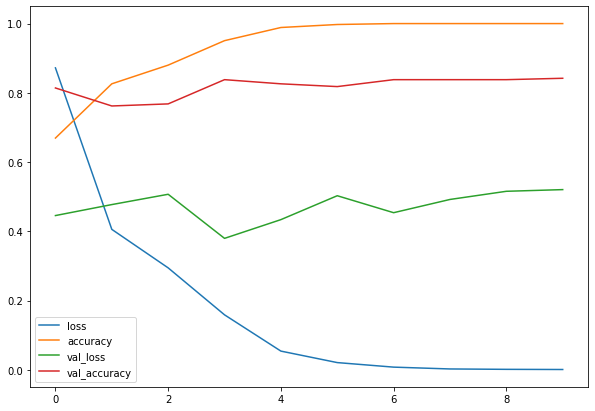

In [66]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));